In [ ]:
# Packages/ libraries
import os #provides functions for interacting wth the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increase the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt



In [ ]:
pip install graphviz

In [ ]:
raw_data = pd.read_csv('/content/churn raw data (1).csv', encoding='latin-1')

In [ ]:
# shape of df and first 5 row
print(raw_data.shape)
raw_data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# check all elements for each feature
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values <12:
        print('The number of values for feature {} : {} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, nr_values))

The number of values for feature RowNumber : 10000
The number of values for feature CustomerId : 10000
The number of values for feature Surname : 2932
The number of values for feature CreditScore : 460
The number of values for feature Geography : 3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender : 2 -- ['Female' 'Male']
The number of values for feature Age : 70
The number of values for feature Tenure : 11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance : 6382
The number of values for feature NumOfProducts : 4 -- [1 2 3 4]
The number of values for feature HasCrCard : 2 -- [0 1]
The number of values for feature IsActiveMember : 2 -- [0 1]
The number of values for feature EstimatedSalary : 9999
The number of values for feature Exited : 2 -- [0 1]


In [ ]:
# checking for null values
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

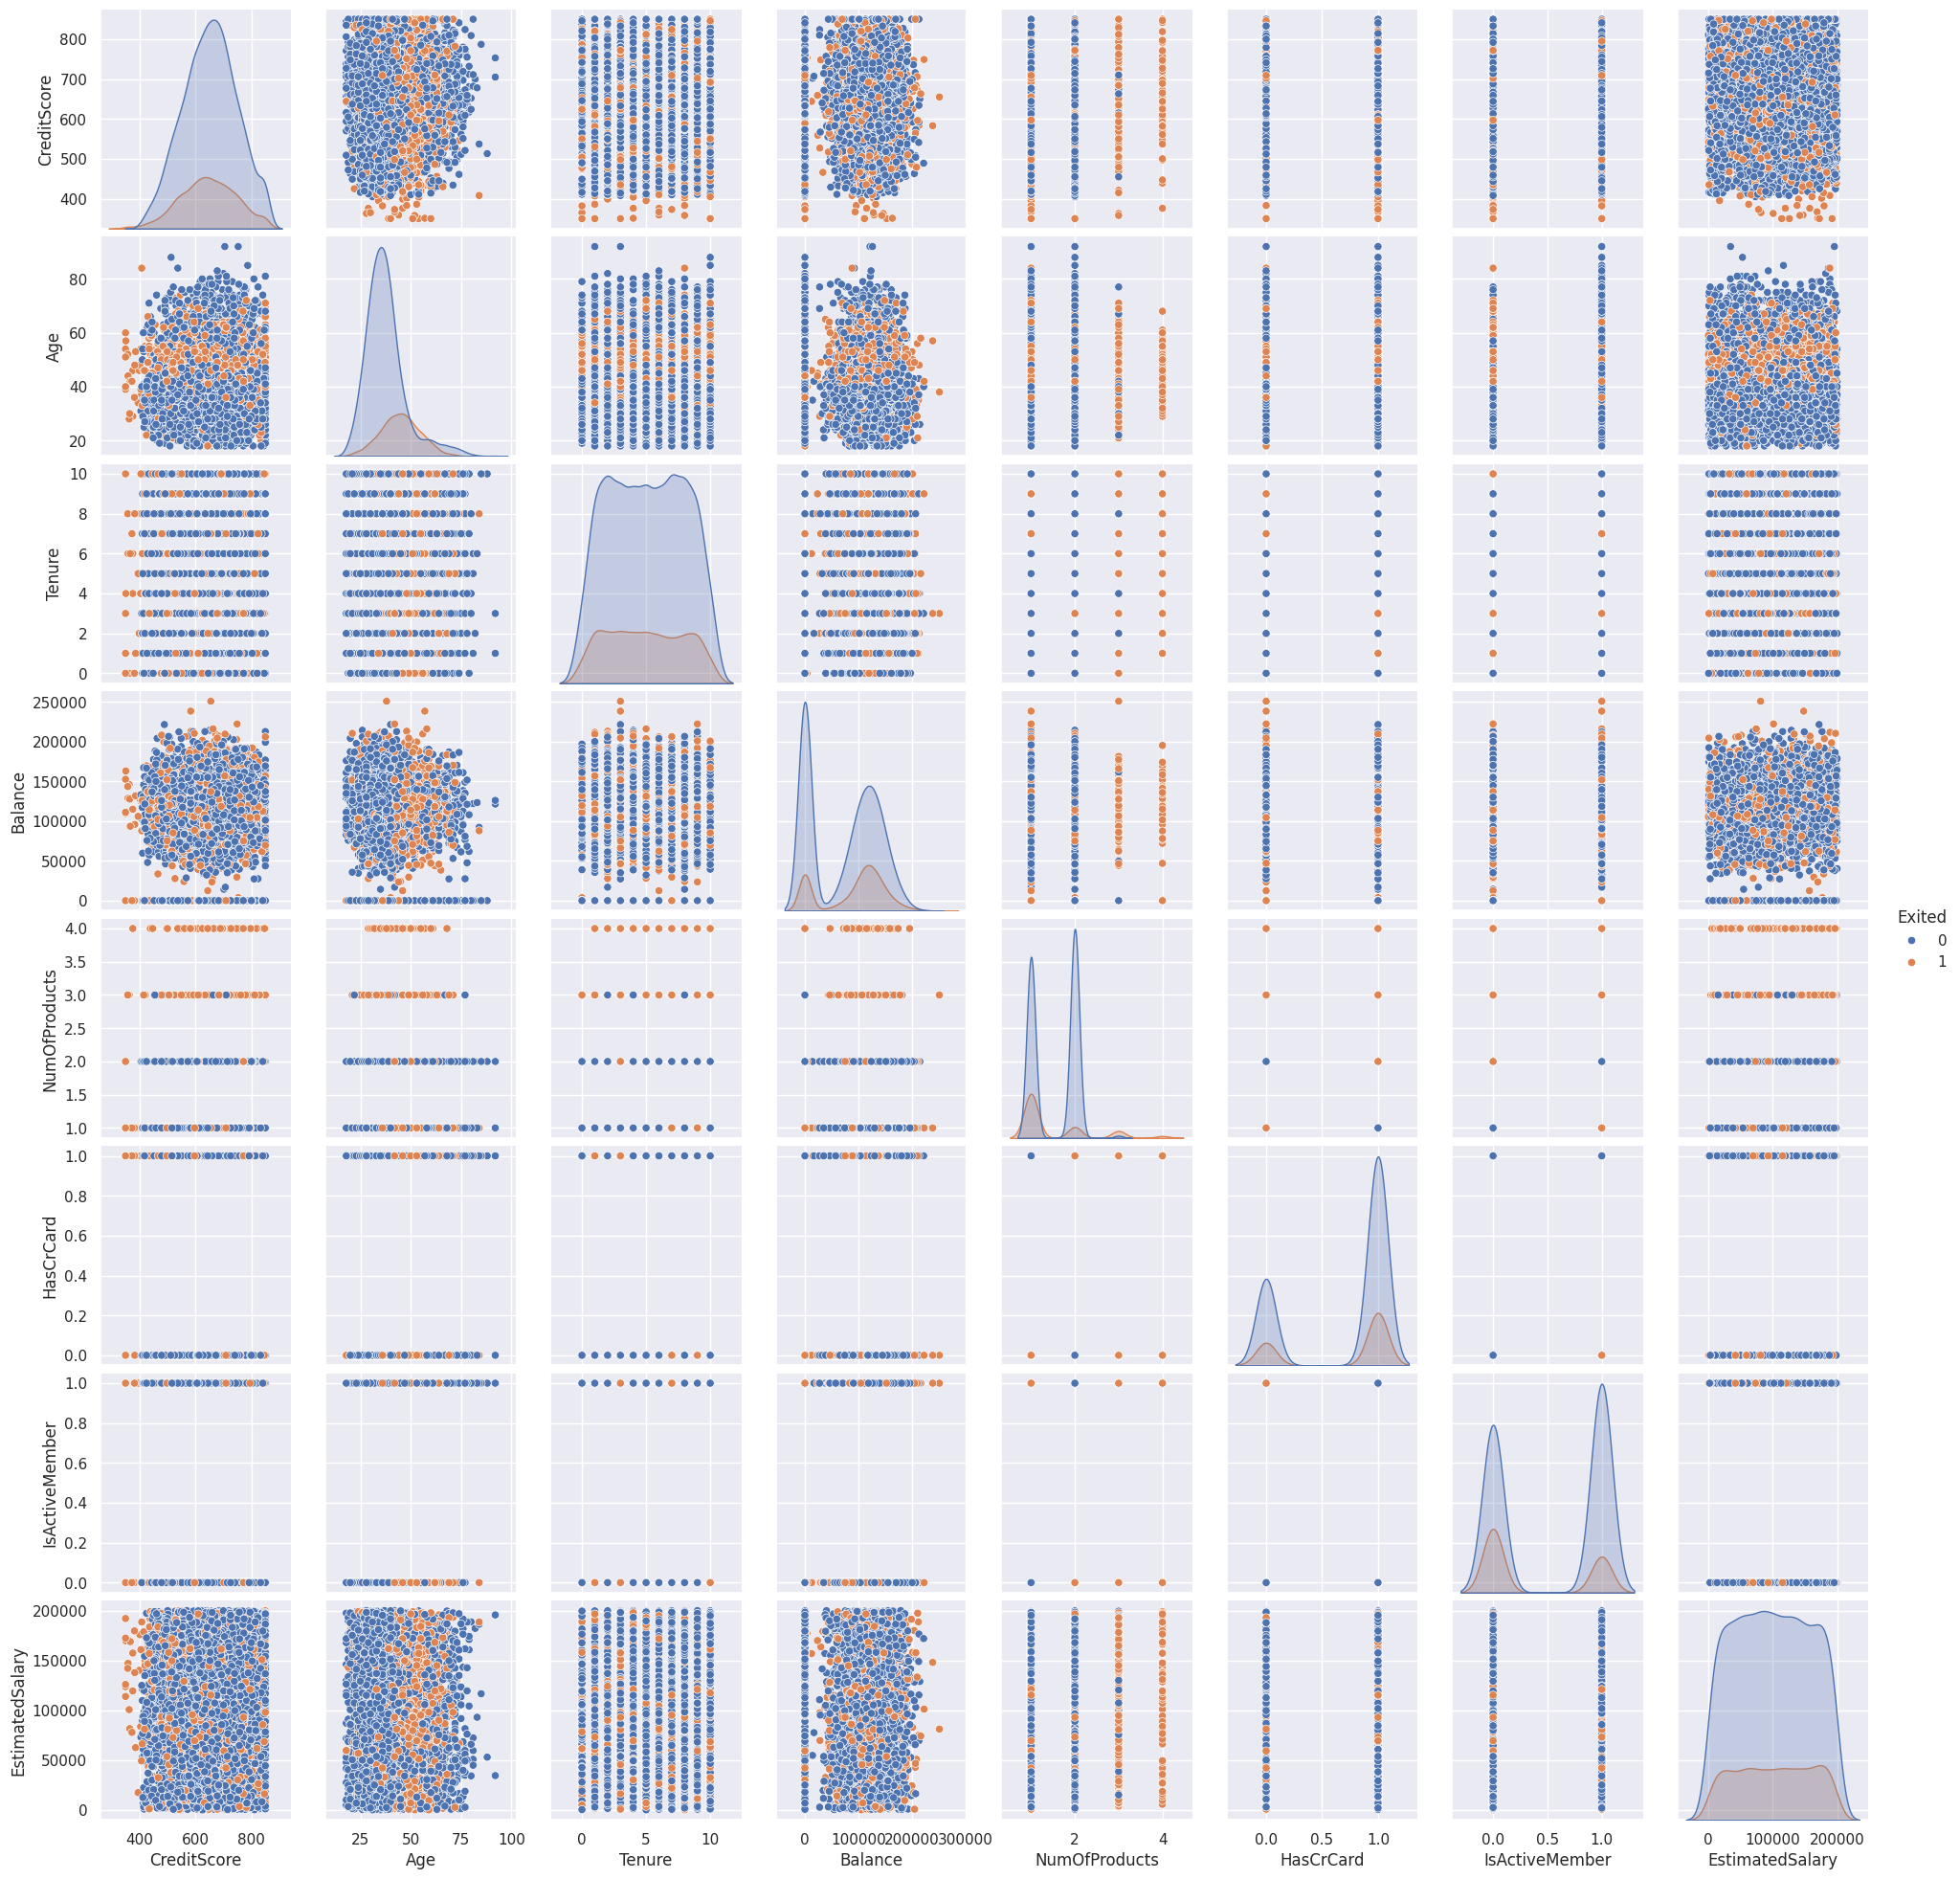

In [ ]:
# Limit data to only numerical columns
raw_data2 = raw_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# visualize the data using seaborn Pairplots
graph = sns.pairplot(raw_data2, hue = 'Exited', diag_kws={'bw':0.2})

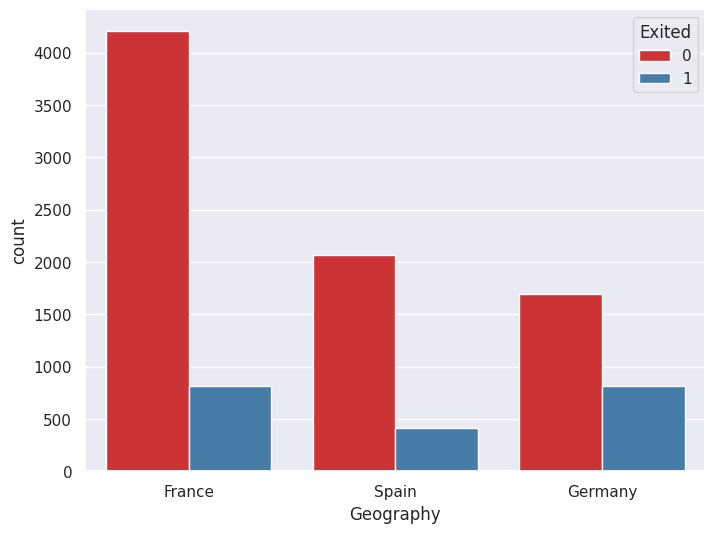

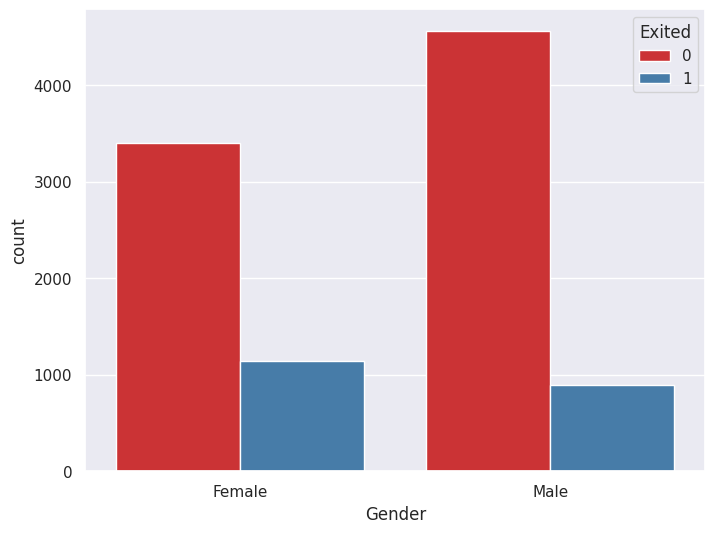

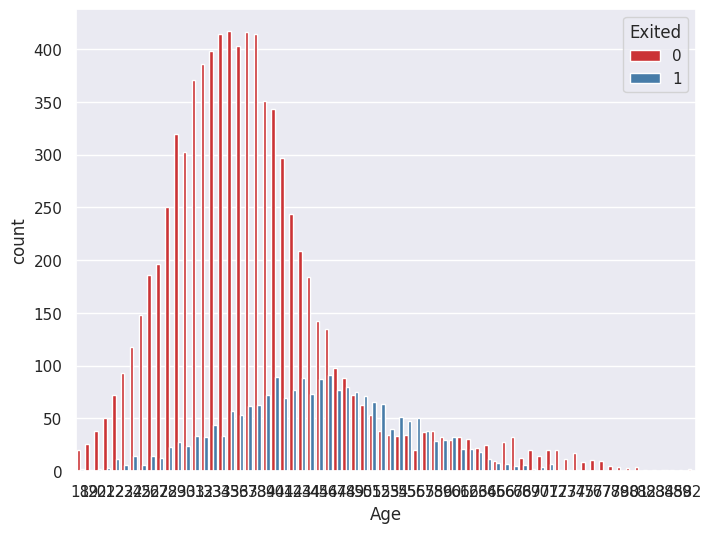

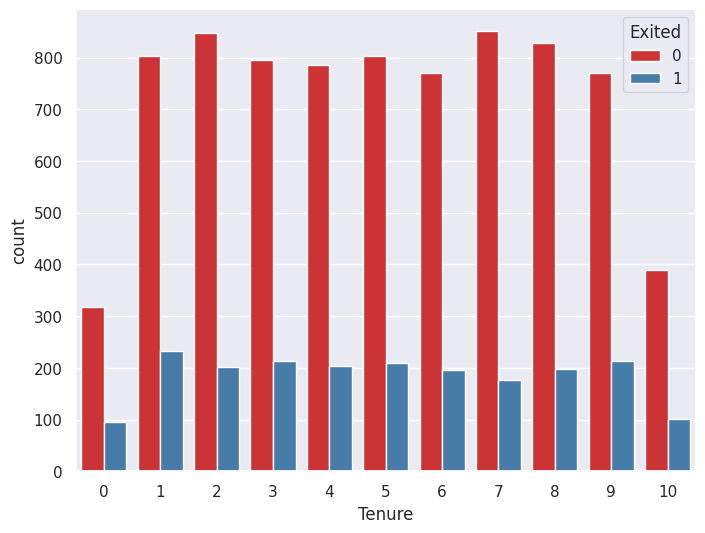

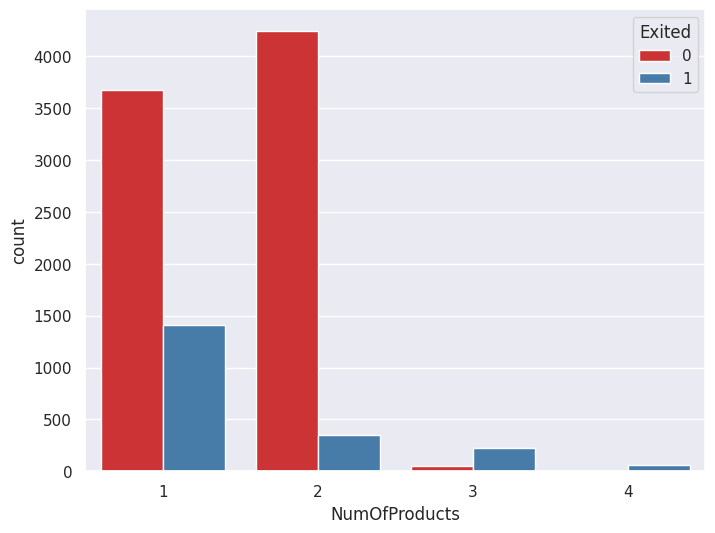

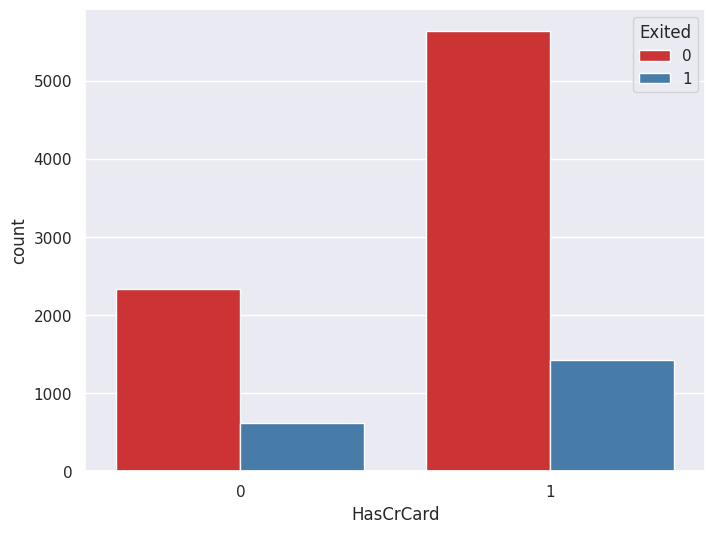

In [ ]:
# Investigate non numeric features
features = ['Geography','Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard']

for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=raw_data2, hue = 'Exited', palette="Set1")

In [ ]:
# Make categorial features into numeric representation

new_raw_data = pd.get_dummies(raw_data2, columns =['Geography', "Gender", "HasCrCard", "IsActiveMember"])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,True,False,False,True,False,False,True,False,True
1,608,41,1,83807.86,1,112542.58,0,False,False,True,True,False,True,False,False,True
2,502,42,8,159660.80,3,113931.57,1,True,False,False,True,False,False,True,True,False
3,699,39,1,0.00,2,93826.63,0,True,False,False,True,False,True,False,True,False
4,850,43,2,125510.82,1,79084.10,0,False,False,True,True,False,False,True,False,True


In [ ]:
# Scale the columns
scaled_vars = ['CreditScore', "EstimatedSalary", "Balance", "Age"]
scaler = MinMaxScaler()
new_raw_data[scaled_vars] = scaler.fit_transform(new_raw_data[scaled_vars])

In [ ]:
new_raw_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,True,False,False,True,False,False,True,False,True
1,0.516,0.310811,1,0.334031,1,0.562709,0,False,False,True,True,False,True,False,False,True
2,0.304,0.324324,8,0.636357,3,0.569654,1,True,False,False,True,False,False,True,True,False
3,0.698,0.283784,1,0.000000,2,0.469120,0,True,False,False,True,False,True,False,True,False
4,1.000,0.337838,2,0.500246,1,0.395400,0,False,False,True,True,False,False,True,False,True
5,0.590,0.351351,8,0.453394,2,0.748797,1,False,False,True,False,True,False,True,True,False
6,0.944,0.432432,7,0.000000,2,0.050261,0,True,False,False,False,True,False,True,False,True
7,0.052,0.148649,4,0.458540,4,0.596733,1,False,True,False,True,False,False,True,True,False
8,0.302,0.351351,4,0.566170,2,0.374680,0,True,False,False,False,True,True,False,False,True
9,0.668,0.121622,2,0.536488,1,0.358605,0,True,False,False,False,True,False,True,False,True


In [ ]:
X = new_raw_data.drop('Exited', axis=1).values # Input features (attributes)
y = new_raw_data['Exited'].values # target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


# 5. **Running Decision** **Tree**


How decision trees work: Desicion trees are a supervised learning method used for classification and regression
The ID3 algorithm begins with the original set{S}, S as the root node.
On each iteration of the algorithm, it iterates through every unused attribute of the set and claculates the entropy( or information gain) of that attribute.
It then selects the attribute with the smallest entropy(or largest information gain) value.
The set is then split by the selected attribute to produce subsets of the data.
The algorithm continues to recurse on each subset, considering only attributes that aren't already selected.



In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

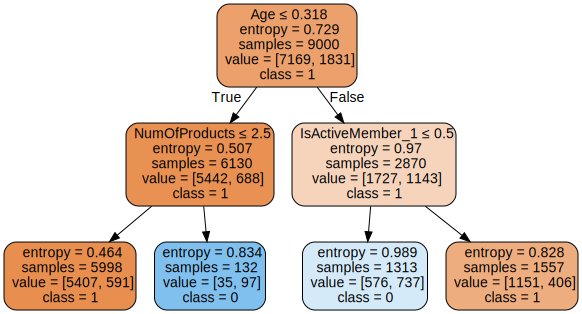

In [ ]:

import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
                               feature_names=new_raw_data.drop('Exited', axis=1).columns,
                               class_names=new_raw_data['Exited'].unique().astype(str),
                               filled=True, rounded=True,
                               special_characters=True)
graph1 = graphviz.Source(dot_data)
graph1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,True,False,False,True,False,False,True,False,True
1,0.516,0.310811,1,0.334031,1,0.562709,0,False,False,True,True,False,True,False,False,True
2,0.304,0.324324,8,0.636357,3,0.569654,1,True,False,False,True,False,False,True,True,False
3,0.698,0.283784,1,0.000000,2,0.469120,0,True,False,False,True,False,True,False,True,False
4,1.000,0.337838,2,0.500246,1,0.395400,0,False,False,True,True,False,False,True,False,True


In [ ]:
# Let's calculate feature importance in order to find out what features most affect customer churn.
for i, column in enumerate(new_raw_data.drop('Exited', axis=1)):
    print("Importance of feature {}:, {:.3f}".format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({"Variable": [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi, fi], ignore_index = True)
    except:
        final_fi = fi

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.622
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.196
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.182


,index,Variable,Feature Importance Score
0,1,Age,0.622346
1,4,NumOfProducts,0.195552
2,14,IsActiveMember_1,0.182102
3,0,CreditScore,0.000000
4,2,Tenure,0.000000
5,3,Balance,0.000000
6,5,EstimatedSalary,0.000000
7,6,Geography_France,0.000000
8,7,Geography_Germany,0.000000
9,8,Geography_Spain,0.000000


In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8213333333333334
Testing Accuracy is:  0.822


In [ ]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix"""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes , yticklabels=classes, vmin=0, vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0, vmax=1.)
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

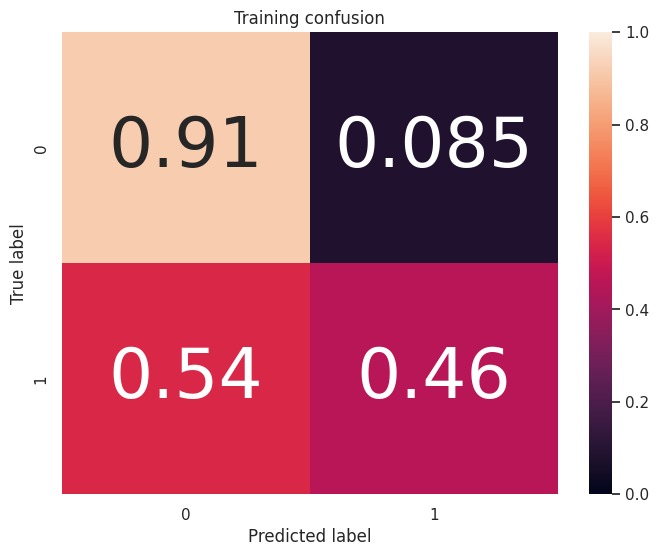

In [ ]:
y_pred = dt.predict(X_train)

#Plot confusion matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [ ]:
# Calculate Fasle positives (FP), False negatives (FN), True positives (TP) and True negatives (TN)
FP = cm.sum(axis=0)-np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP+FN+TP)

#Sensitivity, hit rate, recall, or true positive
TPR = TP/(TP+FN)
print("The True Positive rate/Recall per class is :", TPR)

# Precision or positive predictive vale
PPV = TP/(TP+FP)
print("The Precision per class is: ", PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print("The False Positive rate is: ", FPR)

# False negative rate or Miss rate
FNR = FN/(TP+FN)
print("The False Negative rate is: ", FNR)

# Classification error
CER= FP/(FP+TN)
print("Classification error: ", CER)

# Overall accuracy
ACC= (TP+FN)/(TP+FP+TN+FN)
print("The Accuracy of each class is: ", ACC)
print("")

#Total averages
print("The average Recall is: ", TPR.sum()/2)
print("The average Precision is: ", PPV.sum()/2)
print("The average False Alarm is: ", FPR.sum()/2)
print("The average Miss rate is: ", FNR.sum()/2)
print("The average Classification error is: ", CER.sum()/2)
print("The average Accuracy is: ", ACC.sum()/2)

The True Positive rate/Recall per class is : [0.914772 0.455489]
The Precision per class is:  [0.868034 0.577163]
The False Positive rate is:  [0.544511 0.085228]
The False Negative rate is:  [0.085228 0.544511]
Classification error:  [0.544511 0.085228]
The Accuracy of each class is:  [0.796556 0.203444]

The average Recall is:  0.685130369325603
The average Precision is:  0.7225985220264771
The average False Alarm is:  0.31486963067439694
The average Miss rate is:  0.31486963067439694
The average Classification error is:  0.31486963067439694
The average Accuracy is:  0.5


In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)


print("Random Forest Training Accuracy is:", rf.score(X_train, y_train))


print("Random Forest Testing Accuracy is:", rf.score(X_test, y_test))


Random Forest Training Accuracy is: 1.0
Random Forest Testing Accuracy is: 0.862


In [ ]:

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

print("XGBoost Training Accuracy is:", xgb.score(X_train, y_train))

print("XGBoost Testing Accuracy is:", xgb.score(X_test, y_test))


XGBoost Training Accuracy is: 0.9501111111111111
XGBoost Testing Accuracy is: 0.845


In [ ]:
rf_train_accuracy = rf.score(X_train, y_train)
rf_test_accuracy = rf.score(X_test, y_test)

xgb_train_accuracy = xgb.score(X_train, y_train)
xgb_test_accuracy = xgb.score(X_test, y_test)


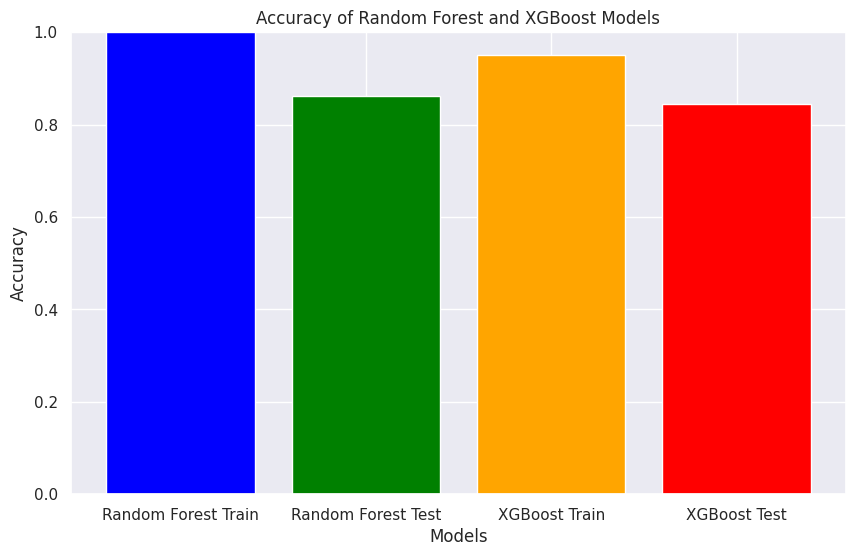

In [ ]:

labels = ['Random Forest Train', 'Random Forest Test', 'XGBoost Train', 'XGBoost Test']
accuracies = [rf_train_accuracy, rf_test_accuracy, xgb_train_accuracy, xgb_test_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest and XGBoost Models')
plt.ylim(0, 1)
plt.show()
